In [2]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set up the Titanic csv file as a DataFrame
titanic = pd.read_csv('train.csv')

# Preview of data
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Info on the data set
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


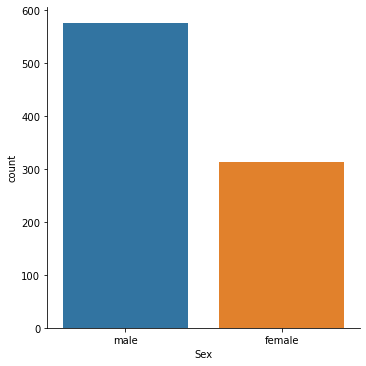

In [4]:
#Question One: Who was on the Titatnic (Age, Sex, etc.)
#Lets look at a breakdown of the passengers Sex
#Based on the image below, more men were passengers on the Titanic
sns.catplot(x='Sex',data=titanic,kind ='count')

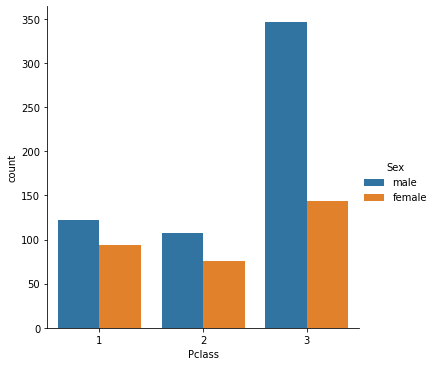

In [5]:
# Now let's seperate the genders by classes.
#Upper, Middle, Lower. Far more people are in the lower class and a majority of them are male.
sns.catplot(x='Pclass',data=titanic,hue='Sex',kind='count')

In [6]:
# I am treating anyone as under 16 as a child

# Define a function to sort through sex 
def male_female_child(passenger):
    age,sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex
    
# Create a new column called 'person'
titanic['person'] = titanic[['Age','Sex']].apply(male_female_child,axis=1)

In [7]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


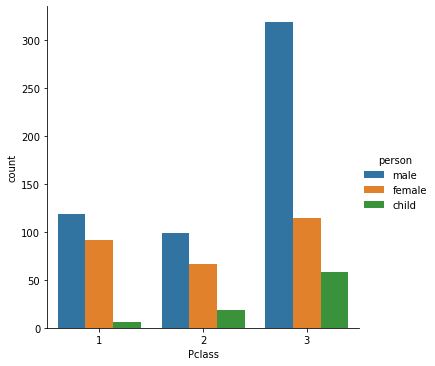

In [8]:
#Not many children are in upper class but there are several in lower class
sns.catplot(x='Pclass',data=titanic,hue='person',kind='count')

<AxesSubplot:>

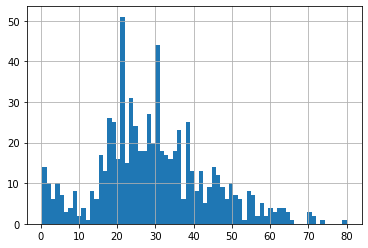

In [9]:
#Showing the age distribution of the passengers
titanic['Age'].hist(bins=70)

In [10]:
#Showing the breakdown for male, female, and child
titanic['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

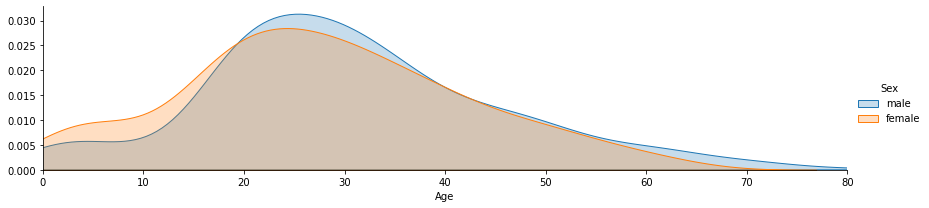

In [11]:
# Set the figure equal to a facetgrid with the pandas dataframe as its data source, 
# set the hue, and change the aspect ratio.
fig = sns.FacetGrid(titanic, hue="Sex",aspect=4)

# Next I uses map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot,'Age',shade= True)

# I Set the x max limit by the oldest passenger
oldest = titanic['Age'].max()

#Set lower limit to 0
fig.set(xlim=(0,oldest))

#Finally add a legend
fig.add_legend()

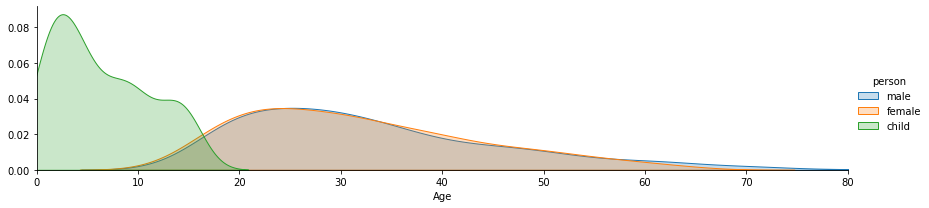

In [12]:
# We could have done the same thing for the 'person' column to include children:

fig = sns.FacetGrid(titanic, hue="person",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

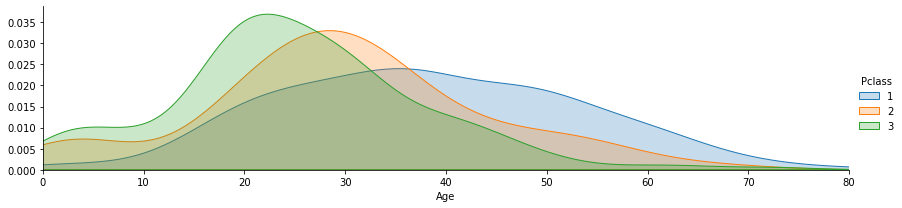

In [13]:
# Let's do the same for class
fig = sns.FacetGrid(titanic, hue="Pclass",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [14]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [15]:
# First we'll drop the NaN values and create a new object, deck
deck = titanic['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

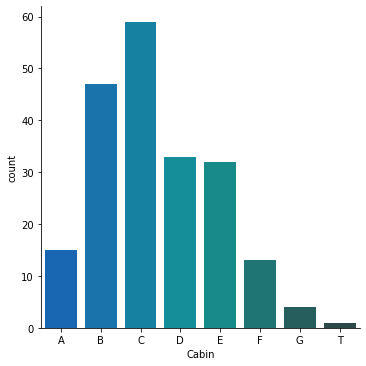

In [16]:
# Grab the first letter of the "level"

levels = []

# create a for loop to grab the first letter
for level in deck:
    levels.append(level[0])    


cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
cabin_df.sort_values(by=['Cabin'],inplace=True)
sns.catplot(x='Cabin',data=cabin_df,palette='winter_d',kind='count')

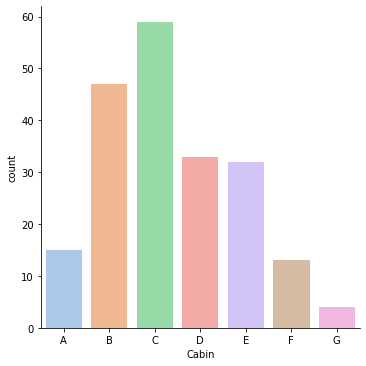

In [17]:
# Redefine cabin_df as everything but where the row was equal to 'T'
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.catplot(x='Cabin',data=cabin_df,palette='pastel', kind='count')

In [18]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


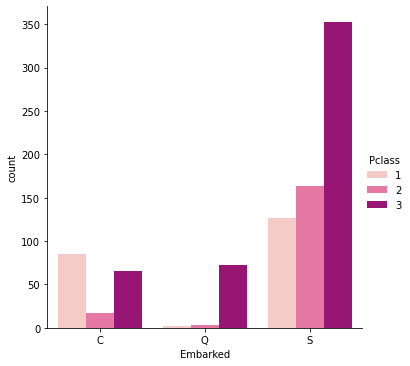

In [19]:
# C = Cherbourg, Q = Queenstown, S = Southampton
sns.catplot(x='Embarked',data=titanic,hue='Pclass',palette='RdPu',order=['C','Q','S'], kind='count')

In [20]:
titanic['Alone'] =  titanic.Parch + titanic.SibSp
titanic['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [21]:
# Look for >0 or ==0 to set alone status
titanic['Alone'].loc[titanic['Alone'] >0] = 'With Family'
titanic['Alone'].loc[titanic['Alone'] == 0] = 'Alone'

/Users/justinpetty/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


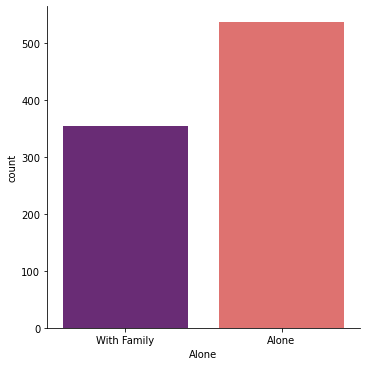

In [22]:
# Most passengers were alone
sns.catplot(x='Alone',data=titanic,palette='magma',kind='count')

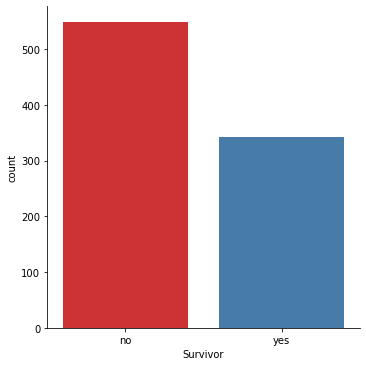

In [23]:
# Let's start by creating a new column for legibility purposes through mapping
titanic["Survivor"] = titanic.Survived.map({0: "no", 1: "yes"})

# A quick overall view of survied vs died. More passengers passed away.
sns.catplot(x='Survivor',data=titanic,palette='Set1',kind='count')

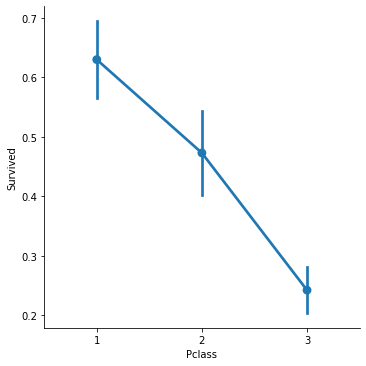

In [24]:
# Let's use a factor plot again, but now considering class
sns.catplot(x='Pclass',y='Survived',data=titanic, kind='point')
#Women and Children First: 3rd class had more men which would affect this data

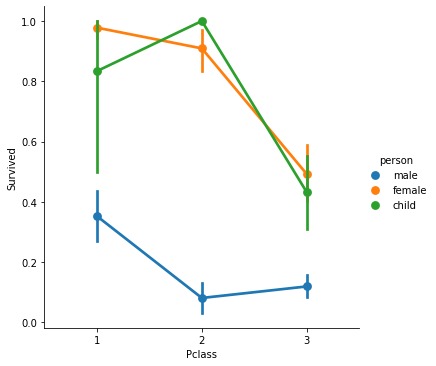

In [25]:
sns.catplot(x='Pclass',y='Survived',hue='person', data=titanic, kind='point')
#This data shows that being in lower class and male is not favorable

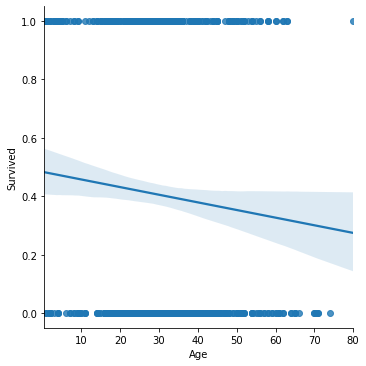

In [26]:
#Less likely to survive if the passenger was older
sns.lmplot(x='Age',y='Survived',data=titanic)

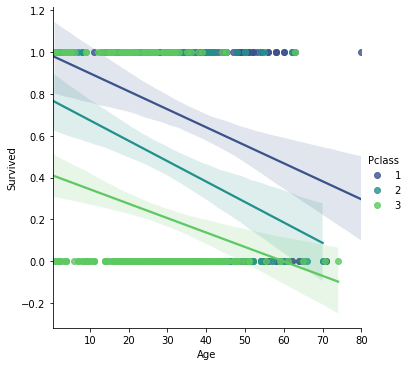

In [28]:
# class seperation
sns.lmplot(x='Age',y='Survived',hue='Pclass',data=titanic,palette='viridis')

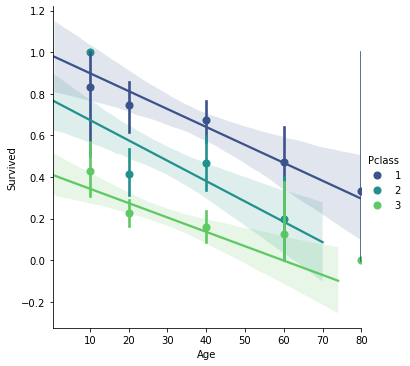

In [30]:
generations=[10,20,40,60,80]
sns.lmplot(x='Age',y='Survived',hue='Pclass',data=titanic,palette='viridis',x_bins=generations)

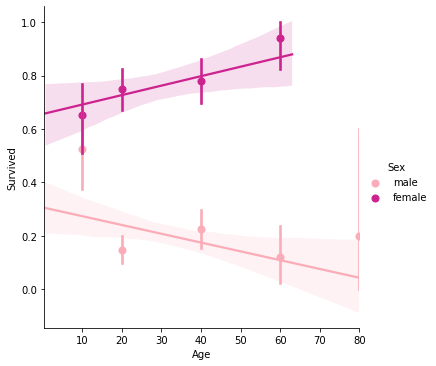

In [32]:
sns.lmplot(x='Age',y='Survived',hue='Sex',data=titanic,palette='RdPu',x_bins=generations)